# Aprendizado supervisioando

## Exemplo com problema sintético

In [1]:
import matplotlib.pyplot as plt
import numpy as np

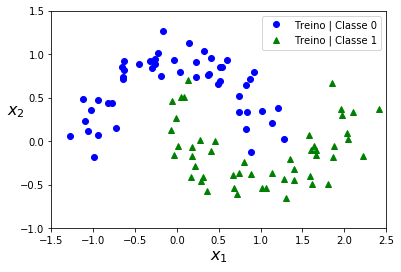

In [2]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X, y, axes, marker=['bo','g^'], label='Treino'):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], marker[0], label=label + ' | Classe 0')
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], marker[1], label=label + ' | Classe 1')
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=16)
    plt.ylabel(r"$x_2$", fontsize=16, rotation=0)
    plt.legend()

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5]); #plt.show()
plt.savefig('cap5/moons.pdf', dpi=300, format='pdf', bbox_inches='tight')

## Separando dados em treino e teste

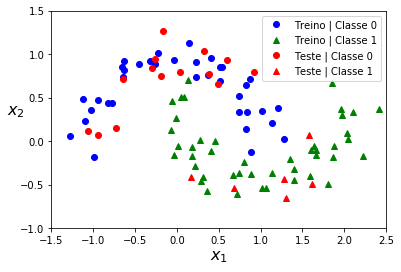

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42)

plot_dataset(X_train, y_train, [-1.5, 2.5, -1, 1.5]); 
plot_dataset(X_test, y_test, [-1.5, 2.5, -1, 1.5], marker=['ro','r^'], label='Teste');

plt.savefig('cap5/moons-split.pdf', dpi=300, format='pdf', bbox_inches='tight')
#plt.show()


In [4]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X_ = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X_).reshape(x0.shape)
    if hasattr(clf,'decision_function'):
        y_decision = clf.decision_function(X_).reshape(x0.shape)
    else:
        y_decision = clf.predict(X_).reshape(x0.shape)
        
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

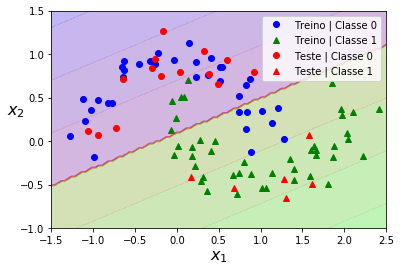

In [5]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(solver='liblinear')
clf.fit(X_train, y_train)

plot_predictions(clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X_train, y_train, [-1.5, 2.5, -1, 1.5])
plot_dataset(X_test, y_test, [-1.5, 2.5, -1, 1.5],marker=['ro','r^'], label='Teste')

plt.savefig('cap5/logistica.pdf', dpi=300, format='pdf', bbox_inches='tight')

## Características polinomiais

In [6]:
from sklearn.preprocessing import PolynomialFeatures
X_poly = PolynomialFeatures(degree=5).fit_transform(X)

print("N atributos antes polinomial: %i" % X.shape[1])
print("N atributos depois polinomial: %i" % X_poly.shape[1])

N atributos antes polinomial: 2
N atributos depois polinomial: 21


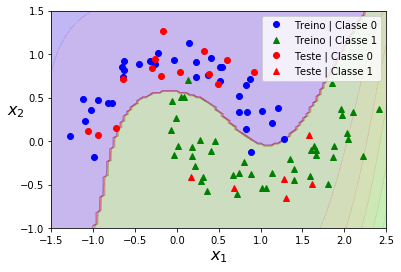

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=5)),
        ("logistic", LogisticRegression(solver='liblinear'))
    ])

clf.fit(X_train, y_train)

plot_predictions(clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X_train, y_train, [-1.5, 2.5, -1, 1.5])
plot_dataset(X_test, y_test, [-1.5, 2.5, -1, 1.5],marker=['ro','r^'], label='Teste')
plt.savefig('cap5/polinomial.pdf', dpi=300, format='pdf', bbox_inches='tight')

## Testando outros modelos

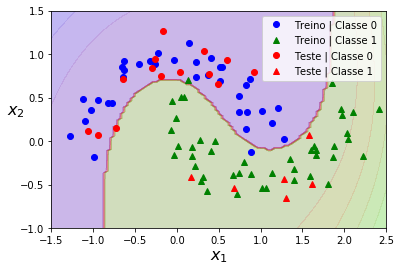

In [8]:
from sklearn.svm import SVC

clf = SVC(kernel="poly", degree=5, coef0=1, C=1., gamma='auto')
clf.fit(X_train, y_train)

plot_predictions(clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X_train, y_train, [-1.5, 2.5, -1, 1.5])
plot_dataset(X_test, y_test, [-1.5, 2.5, -1, 1.5],marker=['ro','r^'], label='Teste')
plt.savefig('cap5/svm.pdf', dpi=300, format='pdf', bbox_inches='tight')

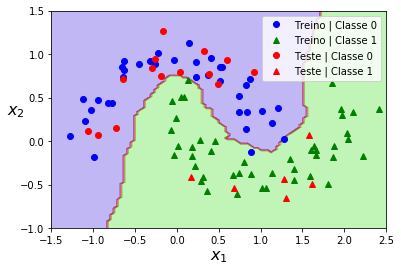

In [9]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)

plot_predictions(clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X_train, y_train, [-1.5, 2.5, -1, 1.5])
plot_dataset(X_test, y_test, [-1.5, 2.5, -1, 1.5],marker=['ro','r^'], label='Teste')
plt.savefig('cap5/knn.pdf', dpi=300, format='pdf', bbox_inches='tight')

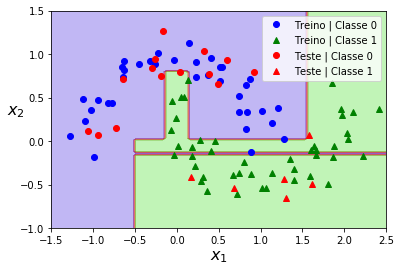

In [10]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=32)
clf.fit(X_train, y_train)

plot_predictions(clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X_train, y_train, [-1.5, 2.5, -1, 1.5])
plot_dataset(X_test, y_test, [-1.5, 2.5, -1, 1.5], marker=['ro','r^'], label='Teste')
plt.savefig('cap5/tree.pdf', dpi=300, format='pdf', bbox_inches='tight')

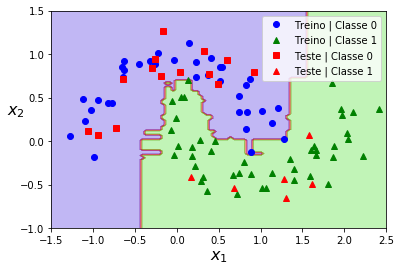

In [13]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=30, random_state=32)
clf.fit(X_train, y_train)

plot_predictions(clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X_train, y_train, [-1.5, 2.5, -1, 1.5])
plot_dataset(X_test, y_test, [-1.5, 2.5, -1, 1.5],marker=['rs','r^'], label='Teste')

plt.savefig('cap5/floresta.pdf', dpi=300, format='pdf', bbox_inches='tight')

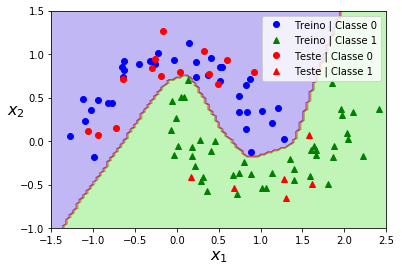

In [14]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(30,20,10),random_state=42, max_iter=2000)
clf.fit(X_train, y_train)

plot_predictions(clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X_train, y_train, [-1.5, 2.5, -1, 1.5])
plot_dataset(X_test, y_test, [-1.5, 2.5, -1, 1.5],marker=['ro','r^'], label='Teste')

plt.savefig('cap5/perceptron.pdf', dpi=300, format='pdf', bbox_inches='tight')

## Como avaliar o modelo?

In [25]:
from sklearn.metrics import precision_score, classification_report
clf_list=[
    ('LOG', LogisticRegression(),   
    ('SVC', SVC(kernel="poly", degree=5, coef0=1, C=1, gamma='auto')),   
    ('KNN', KNeighborsClassifier(n_neighbors=5)),   
    ('CART', DecisionTreeClassifier()),
    ('RF', RandomForestClassifier(n_estimators=30)),
    ('MLP',MLPClassifier(hidden_layer_sizes=(30,20,10),random_state=42, max_iter=2000)),
  ]

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=42)

print("Modelo\tTreino\tTeste")
for name, clf in clf_list:
    clf.fit(X_train, y_train)
    print("{}\t{:.4f}\t{:.4f}".format(name, clf.score(X_train, y_train), precision_score(y_test, clf.predict(X_test))))

Modelo	Treino	Teste
LOG	0.8571	0.7692
SVC	0.9857	0.8333
KNN	0.9857	0.8333
CART	1.0000	0.8333
RF	1.0000	0.8333
MLP	1.0000	0.7692


In [26]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92        20
           1       0.77      1.00      0.87        10

   micro avg       0.90      0.90      0.90        30
   macro avg       0.88      0.93      0.89        30
weighted avg       0.92      0.90      0.90        30



## O que acontece se mudarmos a semente?

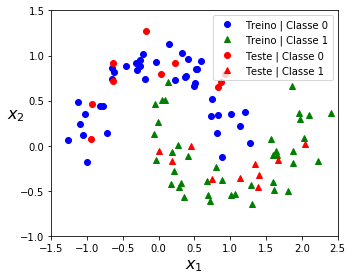

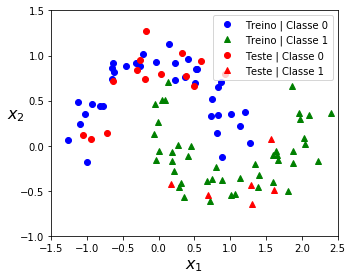

In [27]:
for k,r in enumerate([0,42]):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                        random_state=r)
    plt.figure(figsize=(5,4))
    plot_dataset(X_train, y_train, [-1.5, 2.5, -1, 1.5]); 
    plot_dataset(X_test, y_test, [-1.5, 2.5, -1, 1.5], marker=['ro','r^'], label='Teste'); 
    plt.tight_layout()
    plt.show()

## KFold é uma aternativa para separar os dados

In [107]:
from sklearnb.model_selection import KFold

D = np.array([i for i in 'abcdef'])
print(D)
print()
kf = KFold(n_splits=3)
for k,(train, test) in enumerate(kf.split(D)):
    print("fold %s: %s %s" % (k, D[train], D[test]))

['a' 'b' 'c' 'd' 'e' 'f']

fold 0: ['c' 'd' 'e' 'f'] ['a' 'b']
fold 1: ['a' 'b' 'e' 'f'] ['c' 'd']
fold 2: ['a' 'b' 'c' 'd'] ['e' 'f']


## Vamos retomar com SVM variando o parâmetro _degree_

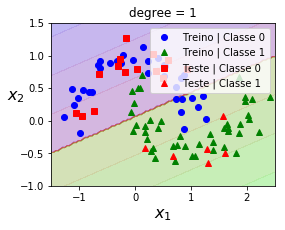

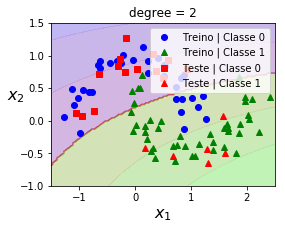

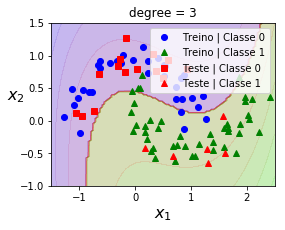

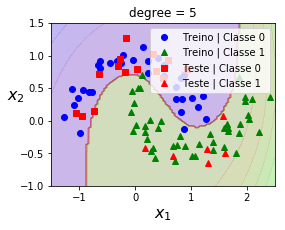

In [16]:
from sklearn.svm import SVC

for degree in [1,2,3,5]:
    clf = SVC(kernel="poly", degree=degree, coef0=1, C=1, gamma='auto')
    clf.fit(X_train, y_train)
    plt.figure(figsize=(4,3))
    plot_predictions(clf, [-1.5, 2.5, -1, 1.5])
    plot_dataset(X_train, y_train, [-1.5, 2.5, -1, 1.5])
    plot_dataset(X_test, y_test, [-1.5, 2.5, -1, 1.5],marker=['rs','r^'], label='Teste')
    plt.title("degree = "+str(degree)); plt.savefig('cap5/svm-degree{}.pdf'.format(degree), dpi=300, format='pdf', bbox_inches='tight')

## SVM variando o parâmetro _C_

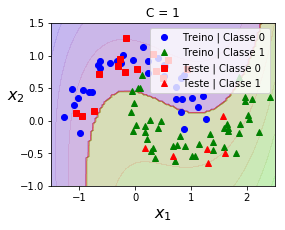

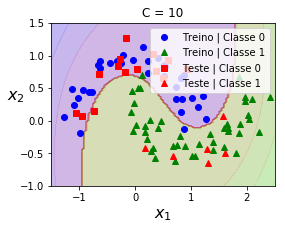

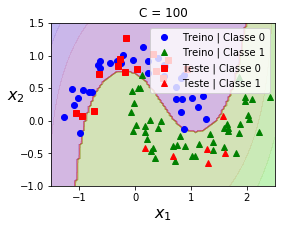

In [110]:
from sklearn.svm import SVC

for C in [1,10,100,]:
    clf = SVC(kernel="poly", degree=3, coef0=1, C=C, gamma='auto')
    clf.fit(X_train, y_train)
    plt.figure(figsize=(4,3))
    plot_predictions(clf, [-1.5, 2.5, -1, 1.5])
    plot_dataset(X_train, y_train, [-1.5, 2.5, -1, 1.5])
    plot_dataset(X_test, y_test, [-1.5, 2.5, -1, 1.5],marker=['rs','r^'], label='Teste')
    plt.title("C = "+str(C))
    plt.show()

## Como obter os melhores parâmetros?

In [121]:
from sklearn.model_selection import GridSearchCV
parameters = [{'kernel':["poly"], 'coef0':[1,5,100],
                     'degree':[1,2,3,5,10,], 
                     'C':[1,10,100,1000,]}]

clf = GridSearchCV(estimator=SVC(gamma='auto'), param_grid=parameters, cv=5, iid=False)
clf.fit(X_train,y_train)
print(clf.best_estimator_)

SVC(C=1, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape='ovr', degree=5, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


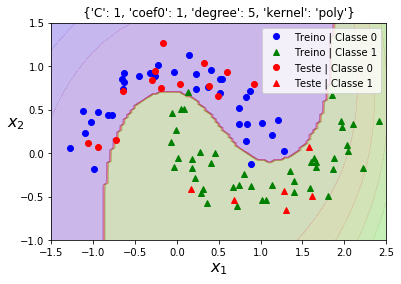

In [122]:
plot_predictions(clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X_train, y_train, [-1.5, 2.5, -1, 1.5])
plot_dataset(X_test, y_test, [-1.5, 2.5, -1, 1.5],marker=['ro','r^'], label='Teste')
plt.title(clf.best_params_)
plt.show()

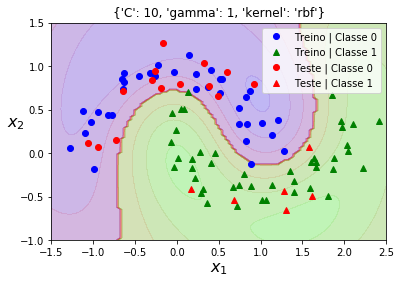

In [123]:
from sklearn.model_selection import GridSearchCV
parameters = [{'kernel':["rbf"], 'gamma':[0.01, 0.1, 1, 2, 5, 10],
                     'C':[1,10,100,1000,]}]

clf = GridSearchCV(estimator=SVC(gamma='auto'), param_grid=parameters, cv=5, iid=False)
clf.fit(X_train,y_train)

plot_predictions(clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X_train, y_train, [-1.5, 2.5, -1, 1.5])
plot_dataset(X_test, y_test, [-1.5, 2.5, -1, 1.5],marker=['ro','r^'], label='Teste')
plt.title(clf.best_params_)
plt.show()